In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path for df
path = r'C:\Users\mk106\OneDrive\Desktop\Mamatha courses and certificates\Instacart Basket Analysis'

In [3]:
#importing df
merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merge.pkl'))

In [4]:
merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,Surnam,gender,STATE,age,date_joined,num_of_dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### Create a histogram of "order_hour_of_day"

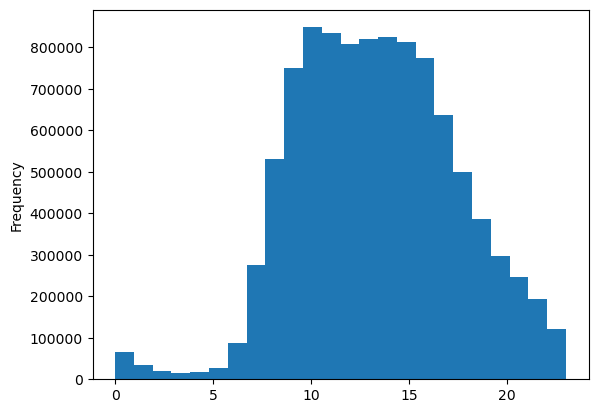

In [5]:
# Creating histogram
hist_order_hour_of_day = merged['order_hour_of_day'].plot.hist(bins = 24)

#### A histogram depicting the “order_hour_of_day” distribution reveals that the peak hours for placing orders occur between 9 am and 4 am, while 1 am to 6 am experiences the lowest order frequency. Additionally, there is a steady drop in orders after 4pm.

In [6]:
#exporting histogram
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'hist_order_hour_of_day.png'))

### Create a bar chart from the "loyalty_flag" column

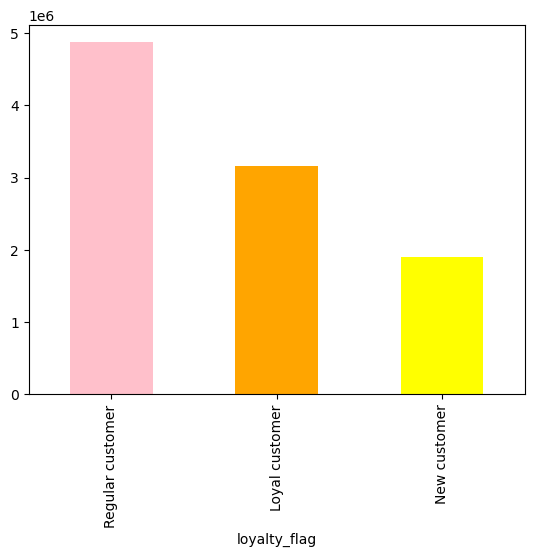

In [7]:
bar_loyalty_flag = merged['loyalty_flag'].value_counts().plot.bar(color = ['pink', 'orange', 'yellow'])

In [8]:
#exporting bar graph
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

### Create a line chart using sample data

In [9]:
#create sample from a list of random floating numbers 
np.random.seed(4)
dev = np.random.rand(len(merged)) <= 0.7

In [10]:
dev

array([False,  True, False, ..., False, False,  True])

In [11]:
# splitting the merged dataframe into big and small
big = merged[dev]
small = merged[~dev]

In [12]:
# checking size of merged
len(merged)

9927401

In [13]:
# confirming the size of big + small
len(big) + len(small)

9927401

In [14]:
# working with the samples of merged df
merged_2 = small[['order_hour_of_day', 'prices']]

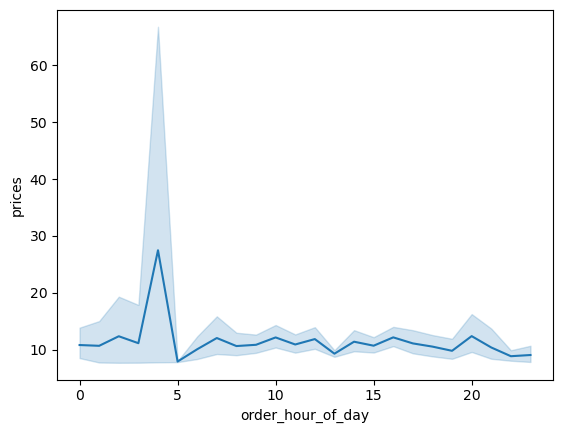

In [15]:
#creating the line graph
line_hour_of_day = sns.lineplot(data = merged_2, x = 'order_hour_of_day', y = 'prices')

In [16]:
#exporting line_hour_of_day
line_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_of_day.png'))

### Create a line chart to determine connection between age and family situation

In [17]:
merged_3 = small[['age', 'num_of_dependants']]

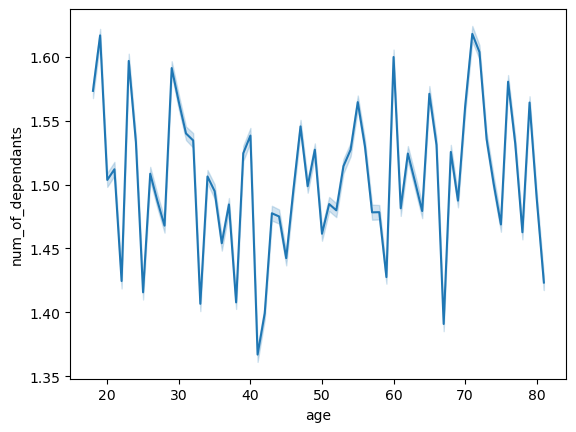

In [18]:
line_age_num_of_dependents = sns.lineplot(data = merged, x = 'age', y = 'num_of_dependants')

#### Line chart 'line_age_num_of_dependents' shows no clear correlation between age and number of dependents.

In [19]:
#exporting line_age_num_of_dependents
line_age_num_of_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_num_of_dependents.png'))

### Create a scatterplot between age and income

In [20]:
merged_4 = small[['age', 'income']]

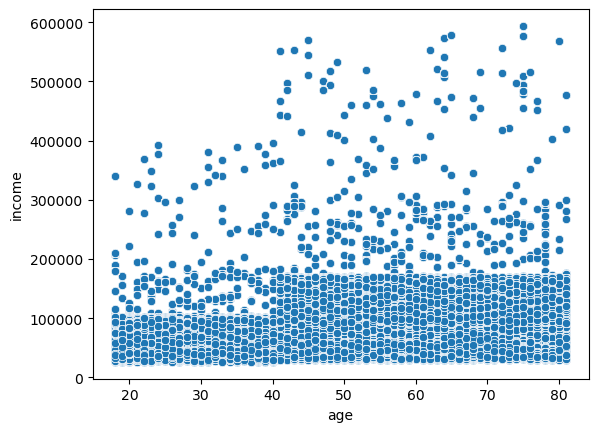

In [21]:
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = merged_4)

#### Scatterplot indicates that most of the people have income less than 200000 but older people in the age range of 40-80 have much higher earning potential compared to 20-39 age group. Notably, the scatterplot demonstrates a change in earning potential from 400000 to 600000 as individuals pass the age of 40, indicating a marked correlation between age and income.

In [22]:
#exporting scatterplot_age_income
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))